## Problem Statment

Pri-Ame Estate Solutions, a prominent real estate company in Nigeria, is facing challenges in accurately
predicting house prices in the current market. To address this issue, they seek the expertise of data
scientists to develop a robust predictive model. The goal is to create a reliable model that can estimate house
prices by analyzing various factors impacting them, thereby aiding informed pricing decisions and
enhancing market competitiveness.

In [2]:
## Impoting the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
## load the dataset

train_data = pd.read_csv("Housing_dataset_train.csv")
test_data = pd.read_csv("Housing_dataset_test.csv")

In [4]:
### Display the first 10 records using the training_set dataframe

train_data.head(10)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
5,1733,Borno,Mansion,NaN,1.0,3.0,1341750.867
6,7892,Kwara,Bungalow,NaN,4.0,4.0,2125789.778
7,3003,Katsina,Penthouse,3.0,3.0,5.0,2043107.592
8,555,Osun,Semi-detached duplex,NaN,1.0,2.0,1219453.877
9,3085,Kaduna,Penthouse,NaN,3.0,3.0,2710664.872


In [5]:
## Display the last 10 records using the train_data
train_data.tail(10)

,ID,loc,title,bedroom,bathroom,parking_space,price
13990,7174,Kebbi,Penthouse,8.0,7.0,3.0,3086400.032
13991,8857,Zamfara,NaN,4.0,7.0,NaN,1601556.469
13992,3423,Ogun,Cottage,1.0,2.0,2.0,1508351.845
13993,3731,Delta,NaN,NaN,1.0,3.0,2458443.818
13994,10477,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718
13999,8787,Nasarawa,NaN,9.0,7.0,5.0,2858516.890


In [6]:
## Show the first five rows of the test_data
test_data.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [7]:
## Show the last five rows of the test data
test_data.tail()

,ID,loc,title,bedroom,bathroom,parking_space
5995,1594,Ekiti,Flat,4,5,2
5996,2416,Adamawa,Terrace duplex,5,7,1
5997,10195,Oyo,Townhouse,4,1,4
5998,9455,Bauchi,Flat,3,7,5
5999,11736,Sokoto,Mansion,6,1,6


In [8]:
## determine the number records and features in both the train and test data
print("The training data/set have the following shape:\n {} records/rows and \n{} features/columns.".format(train_data.shape[0], train_data.shape[1]))
print("=" * 20)
print("The test data have the following shape:\n {} records/rows and \n{} features/columns.".format(test_data.shape[0], test_data.shape[1]))

The training data/set have the following shape:
 14000 records/rows and 
7 features/columns.
The test data have the following shape:
 6000 records/rows and 
6 features/columns.


In [9]:
### show the datatypes of each fatures in the training data
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


## Exploraory Data Analysis

In this section, the training dataset is analysed using various forms of descriptive statistics.

In [11]:
## remove any scientific notation
pd.options.display.float_format = "{:.4f}".format

In [12]:
## Get the summary statistics of the dataframe
train_data.describe(include = "all")

,ID,loc,title,bedroom,bathroom,parking_space,price
count,14000.0000,12187,12278,12201.0000,12195.0000,12189.0000,14000.0000
unique,NaN,36,10,NaN,NaN,NaN,NaN
top,NaN,Kaduna,Flat,NaN,NaN,NaN,NaN
freq,NaN,370,1372,NaN,NaN,NaN,NaN
mean,4862.7004,NaN,NaN,4.3082,3.1342,3.1698,2138081.7487
std,3818.3482,NaN,NaN,2.4412,2.0359,1.5994,1083056.6649
min,0.0000,NaN,NaN,1.0000,1.0000,1.0000,431967.2900
25%,1672.7500,NaN,NaN,2.0000,1.0000,2.0000,1393989.5175
50%,3527.0000,NaN,NaN,4.0000,2.0000,3.0000,1895223.0705
75%,8011.2500,NaN,NaN,6.0000,5.0000,4.0000,2586699.4940


##### The summary table above showed that:
* There are 36 unique entries for the `location` variable with Kaduna having most of observations.
* Also the statistic showed that there are 10 different unique values for the `title` column with flat being the most common title.
* With respect to the values in the `bedroom` column, the highest number of bedroom is **9** while the lowest value is **1**.
  - On the average, the data revealed that mean number of bedroom is around **4.3** bedrooms.
  - Also the median value for the bedroom variable is approximately equal **4**, which is very close to the average value. This is clearly an indication of absent of an outlier in the `bedroom` variable.

* Looking at the statistics of the `bathroom` column, The minimum number of bathroom is **1** while the maximum number is **7**.
      - Also the mean value for this variable is around **3** and median is exactly **2**.

* The `parking_space` feature has average value of **3.2** with a minimum and maximum value of **1** and **6** respectively.

* Finally, the mean house `price` is roughly around **#2,138,081.75** with a median price of **#1,895,223.07**.
      - The cheapest house cost **#431,967.29** while the most expensive house cost around **#16,568,486.16**




  

In [14]:
## Extract the count of total records in each location
train_data["loc"].value_counts()

loc
Kaduna         370
Anambra        363
Benue          355
Yobe           353
Borno          351
Kano           351
Nasarawa       349
Cross River    349
Zamfara        348
Imo            348
Ebonyi         346
Kebbi          346
Katsina        345
Ogun           345
Ondo           344
Gombe          343
Bauchi         342
Oyo            341
Adamawa        341
Bayelsa        340
Plateau        338
Osun           338
Jigawa         337
Ekiti          336
Kwara          333
Niger          330
Akwa Ibom      329
Lagos          328
Sokoto         326
Delta          325
Enugu          324
Rivers         323
Kogi           321
Taraba         315
Abia           312
Edo            302
Name: count, dtype: int64

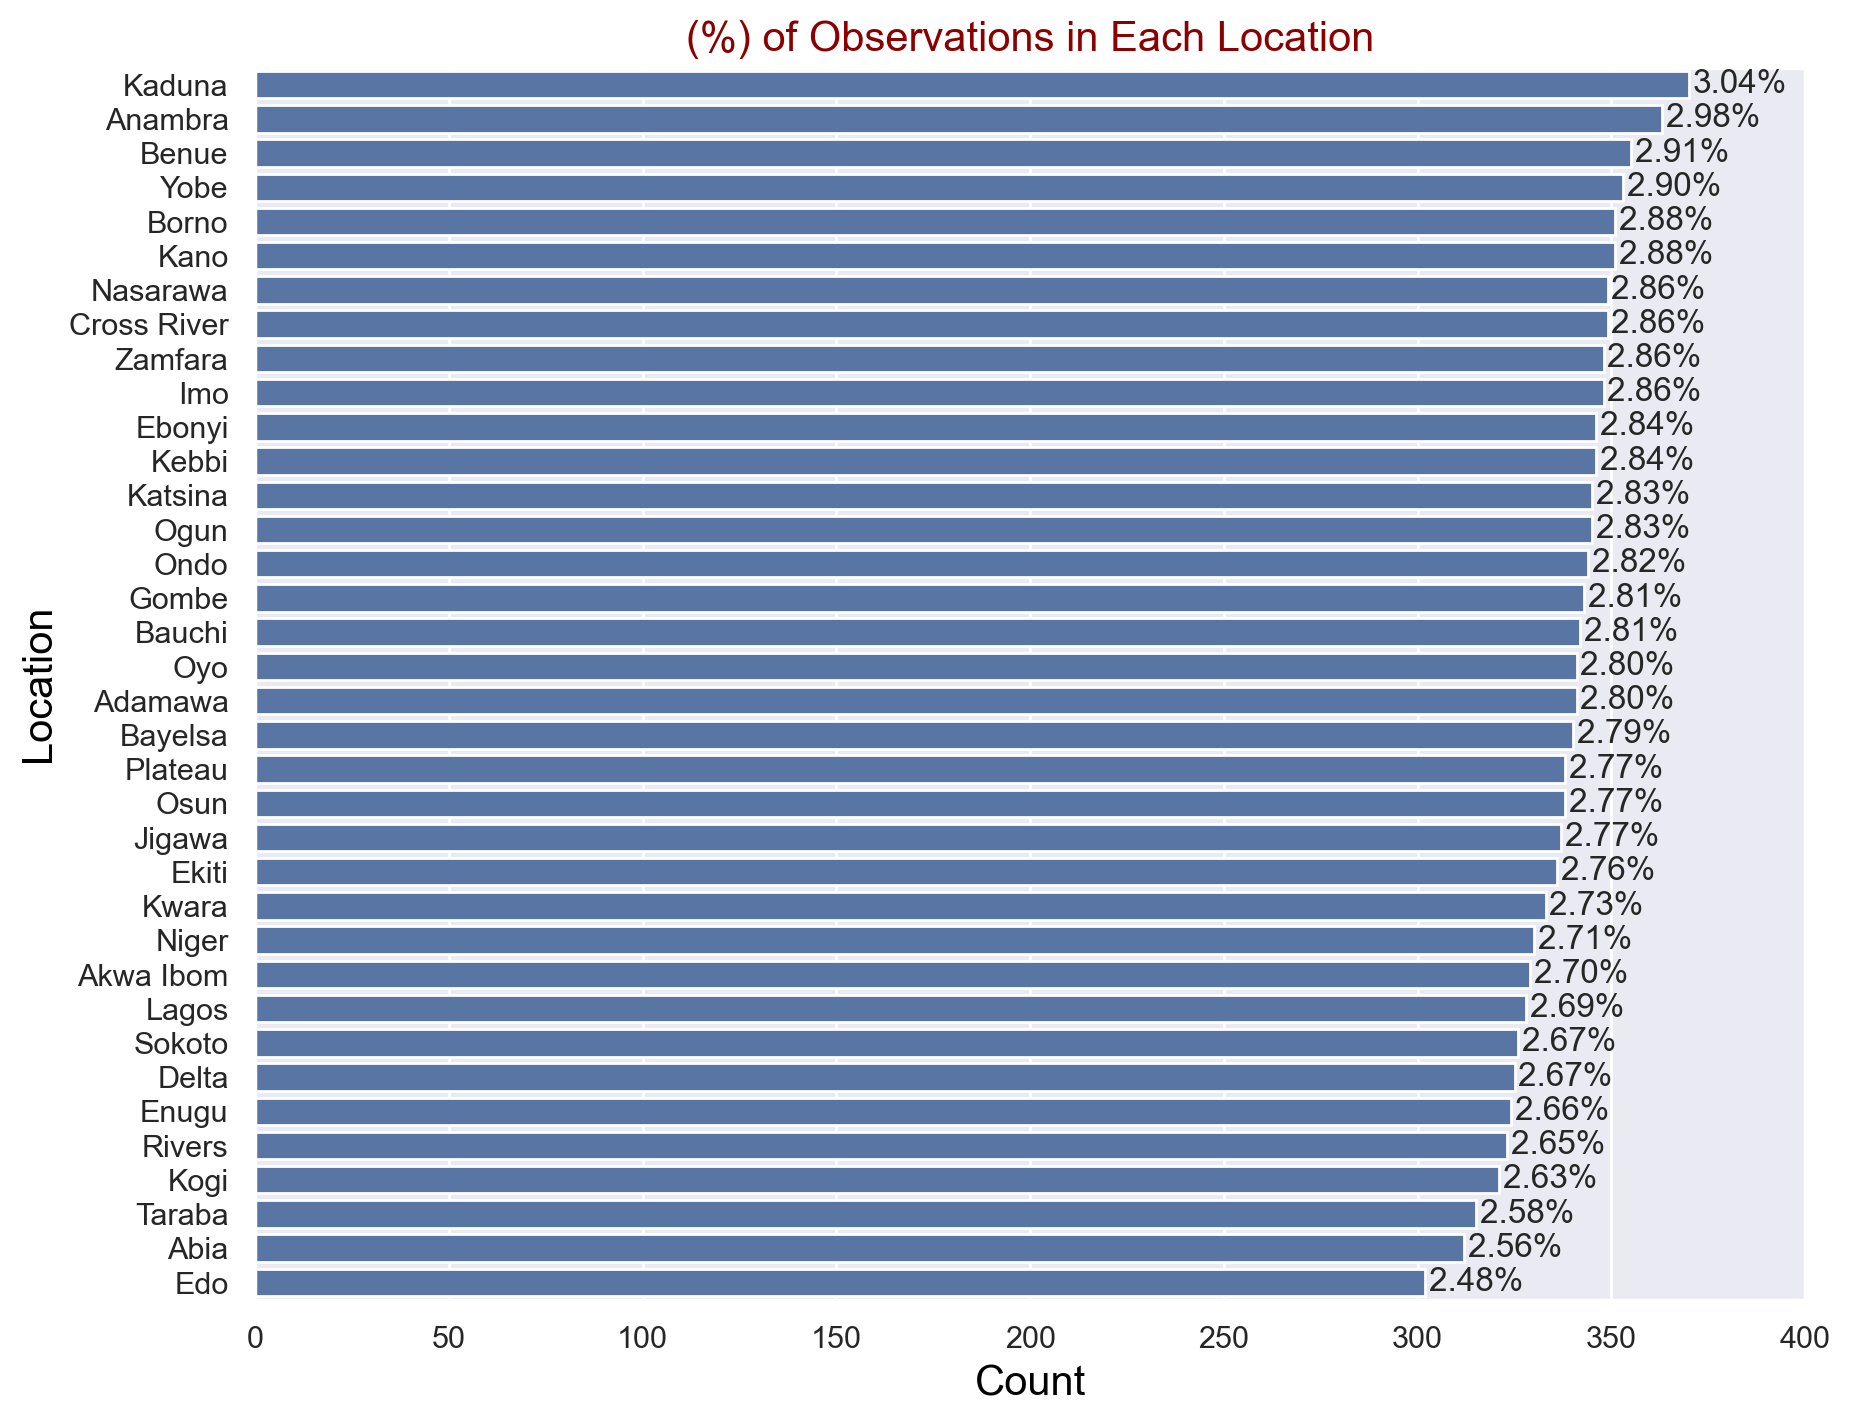

In [15]:
## make a bar chart for the location feature

plt.figure(figsize = [10, 8]) 

loc_order = train_data["loc"].value_counts().index
loc_count = train_data["loc"].value_counts()
n_data = train_data["loc"].value_counts().sum()
max_loc_count = loc_count.iloc[0]
max_prop = max_loc_count / n_data
tick_prop = np.arange(0, max_prop, 0.02)

sns.countplot(data = train_data, y = "loc", order = loc_order)
plt.title("(%) of Observations in Each Location", fontdict = {"color" : "darkred", "size" : 15})
plt.xlabel("Count", fontdict = {"color" : "black", "size" : 15})
plt.ylabel("Location", fontdict = {"color" : "black", "size" : 15})

for i in range(loc_count.shape[0]):
    count = loc_count.iloc[i]
    pct_string = "{:0.2f}%".format(100 * count / n_data)
    plt.text(count+1, i, pct_string, va = "center")

plt.xlim(0, 400)

## test to save
plt.savefig("dash_board_test.png")

plt.show()

In [16]:
### Extract total count of records title column
train_data["title"].value_counts()

title
Flat                    1372
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex    1299
Bungalow                1293
Terrace duplex          1266
Cottage                  450
Name: count, dtype: int64

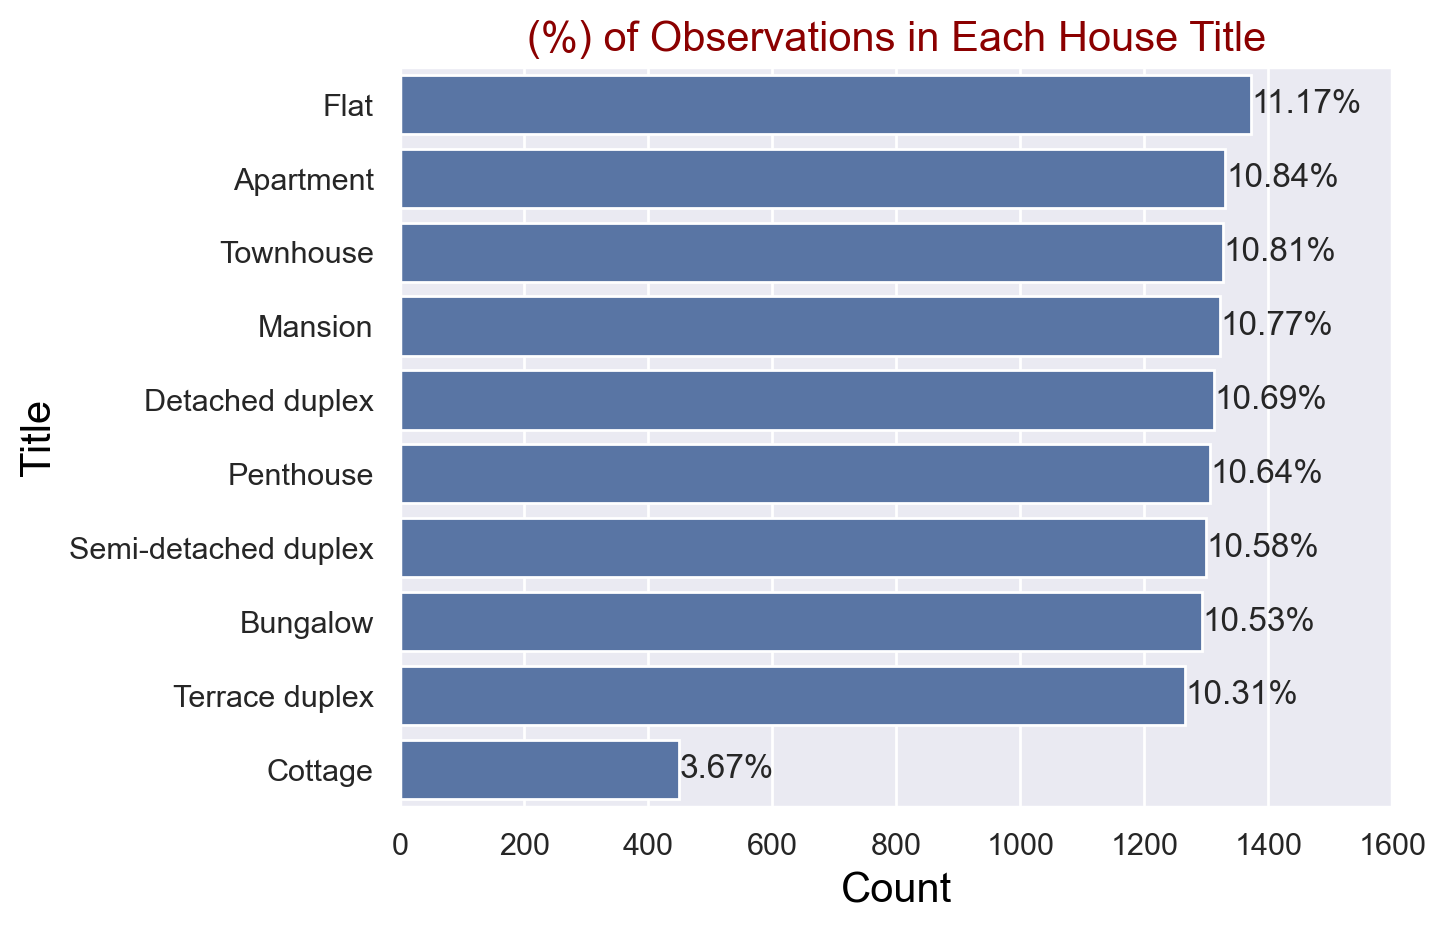

In [17]:
## Make a bar chart showing proportion (in percentages) of observations in the title column
title_order = train_data["title"].value_counts().index
title_count = train_data["title"].value_counts()
n_data = train_data["title"].value_counts().sum()
max_title_count = title_count.iloc[0]
max_prop = max_title_count / n_data
tick_prop = np.arange(0, max_prop, 0.02)

sns.countplot(data = train_data, y = "title", order = title_order)
plt.title("(%) of Observations in Each House Title", fontdict = {"color" : "darkred", "size" : 15})
plt.xlabel("Count", fontdict = {"color" : "black", "size" : 15})
plt.ylabel("Title", fontdict = {"color" : "black", "size" : 15})

for i in range(title_count.shape[0]):
    count = title_count.iloc[i]
    pct_string = "{:0.2f}%".format(100 * count / n_data)
    plt.text(count+1, i, pct_string, va = "center")

plt.xlim(0, 1600)

## test to save
plt.savefig("dash_board_title.png")

plt.show()

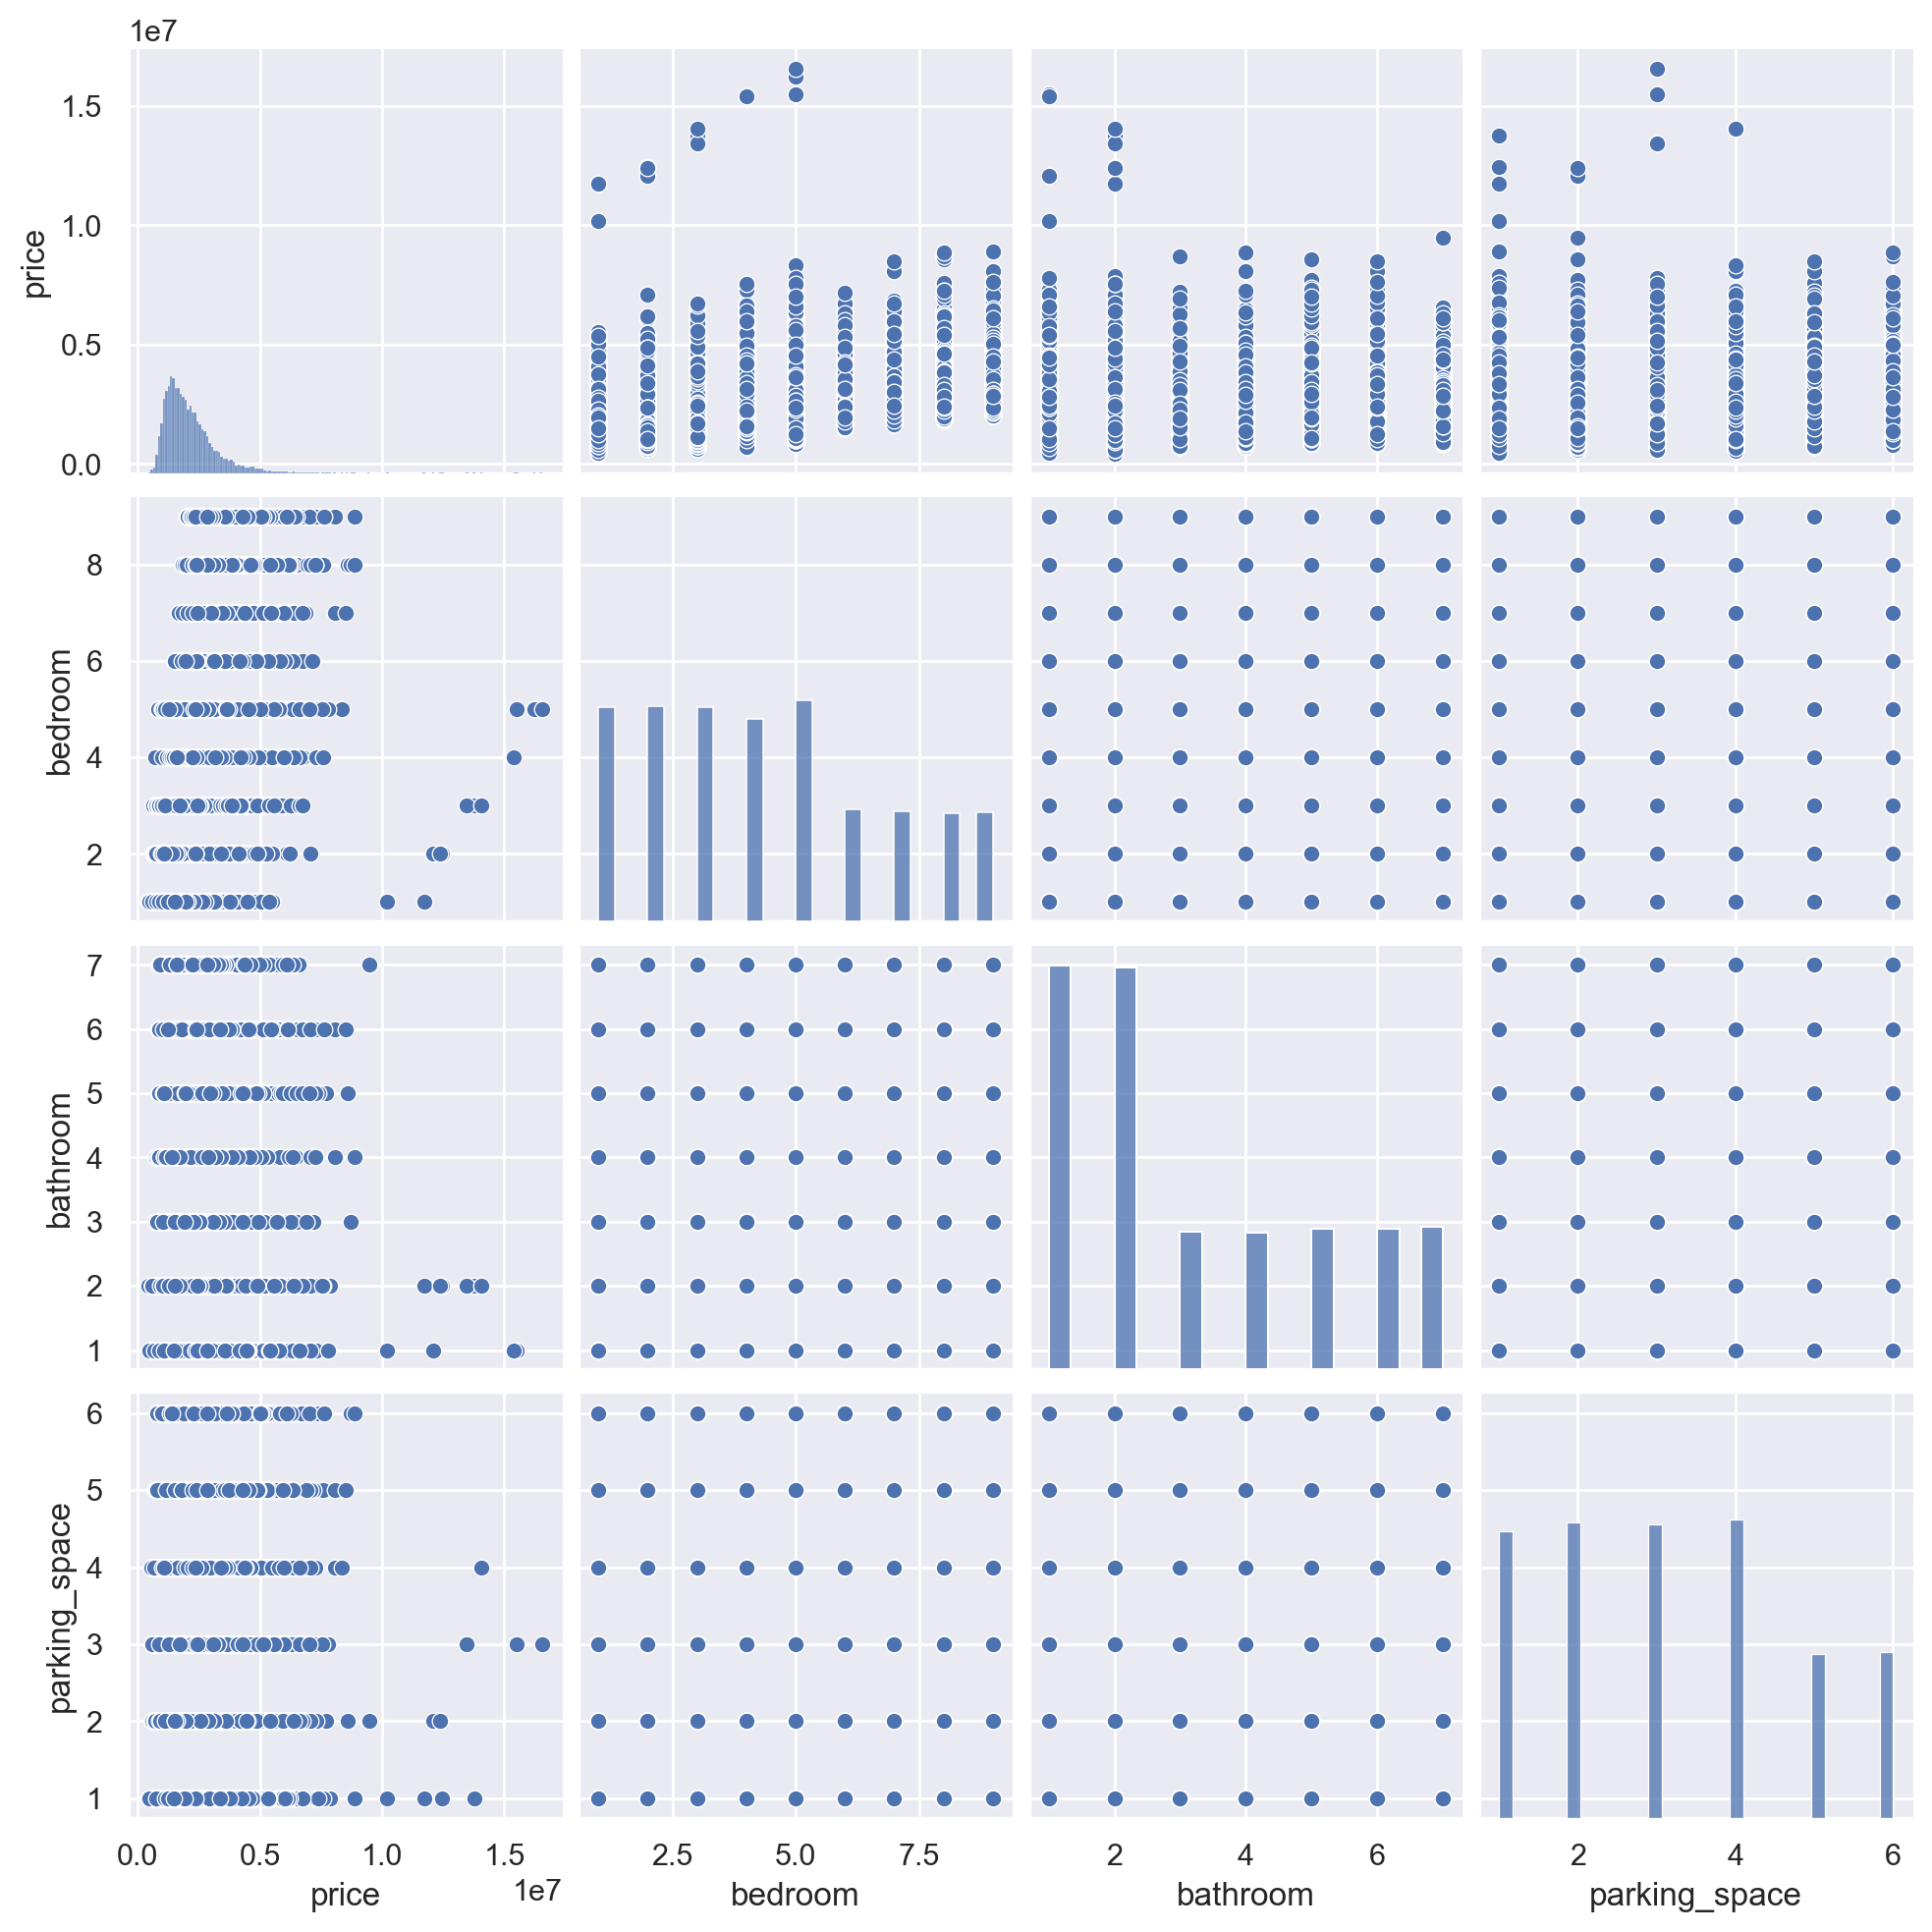

In [18]:
## creating a pairplot
sns.pairplot(train_data[["price", "bedroom", "bathroom", "parking_space"]]);

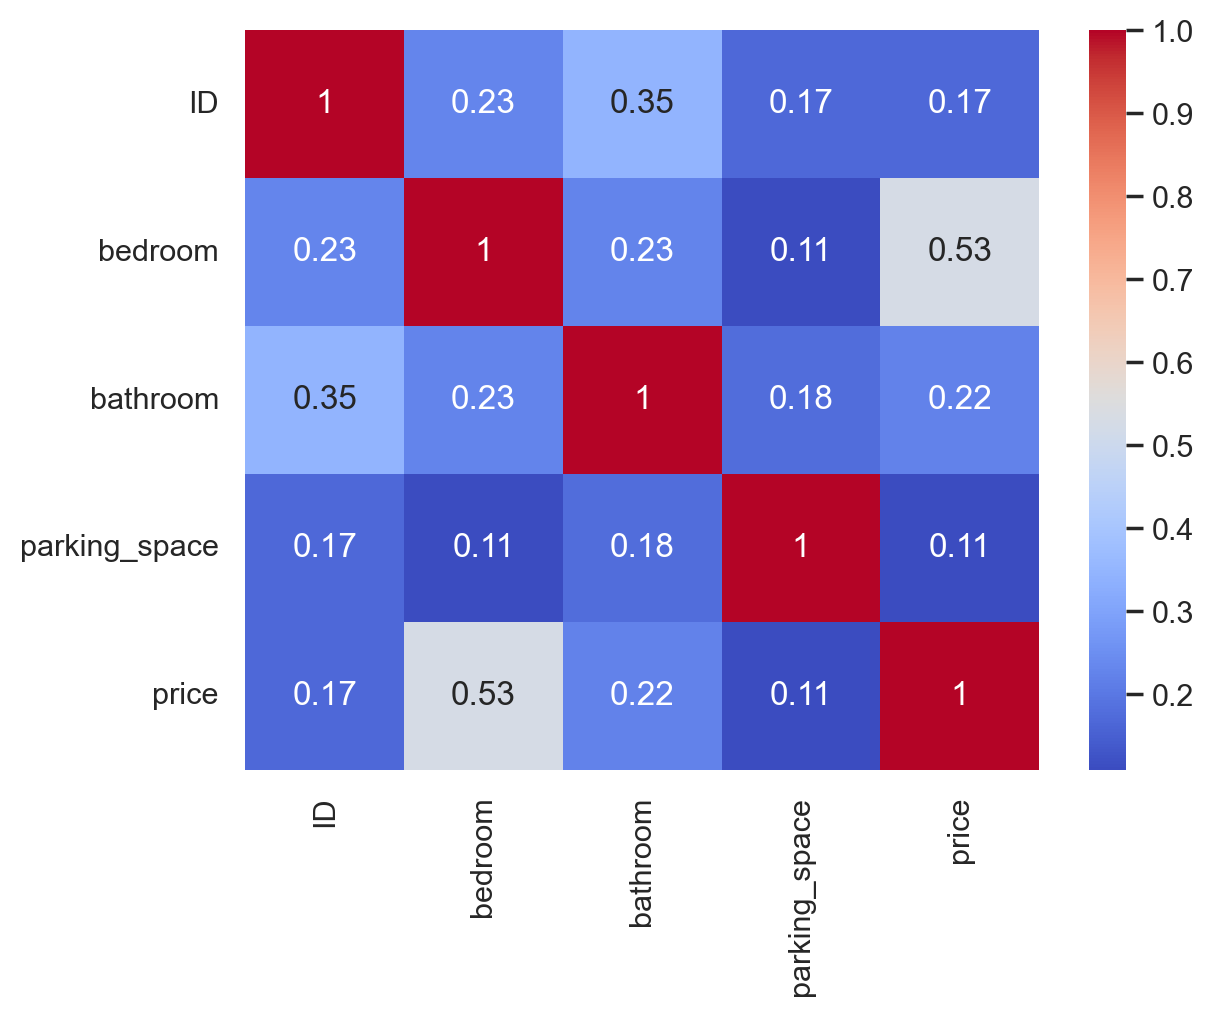

In [19]:
## Examine correlations use heatmap
sns.heatmap(train_data[["ID","bedroom", "bathroom", "parking_space", "price"]].corr(), annot=True, cmap='coolwarm')
plt.show()

There exist a positive moderate correlations between house prices and number bedroom

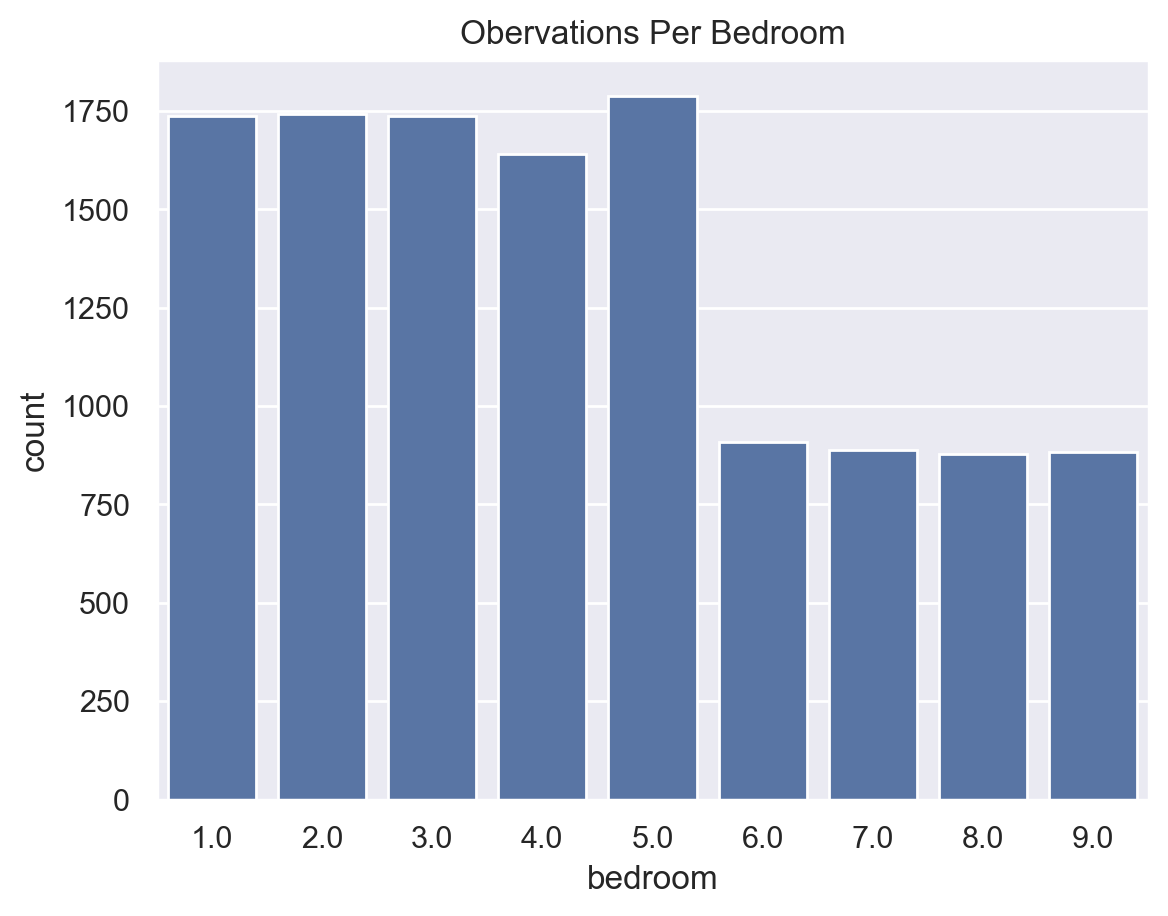

In [21]:
### show  distribution of bedroom column

sns.countplot(data = train_data, x = "bedroom")

plt.title("Obervations Per Bedroom")

plt.show()

Looking at this visual, it is obvious that most houses in the data have **5** number of bedrooms, put differently, from a statistical point of view, it is better to say that the expected value for this variable is **5**, meaning that if we take a sample of more houses many-many times and record the number of bedrooms, we expect to obtain atleast 5 number of bedrooms.

In [23]:
print(train_data["bathroom"].max())
print(train_data["bathroom"].min())



7.0
1.0


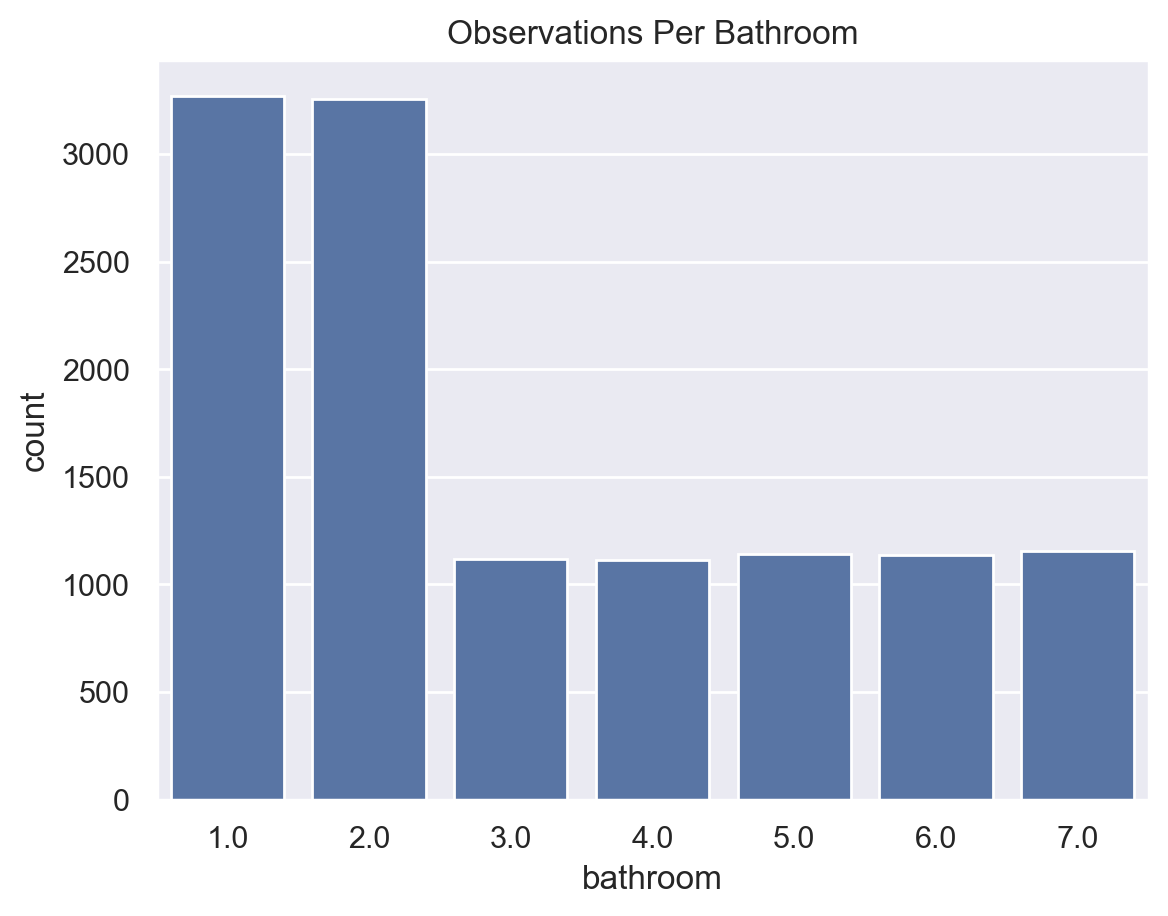

In [24]:
## show the distribution of the bathroom variable
sns.countplot(data = train_data, x = "bathroom")

plt.title("Observations Per Bathroom")

plt.show()

The `bathroom` distribution showed that most observations in the data have between **1** to **2** number of bathrooms

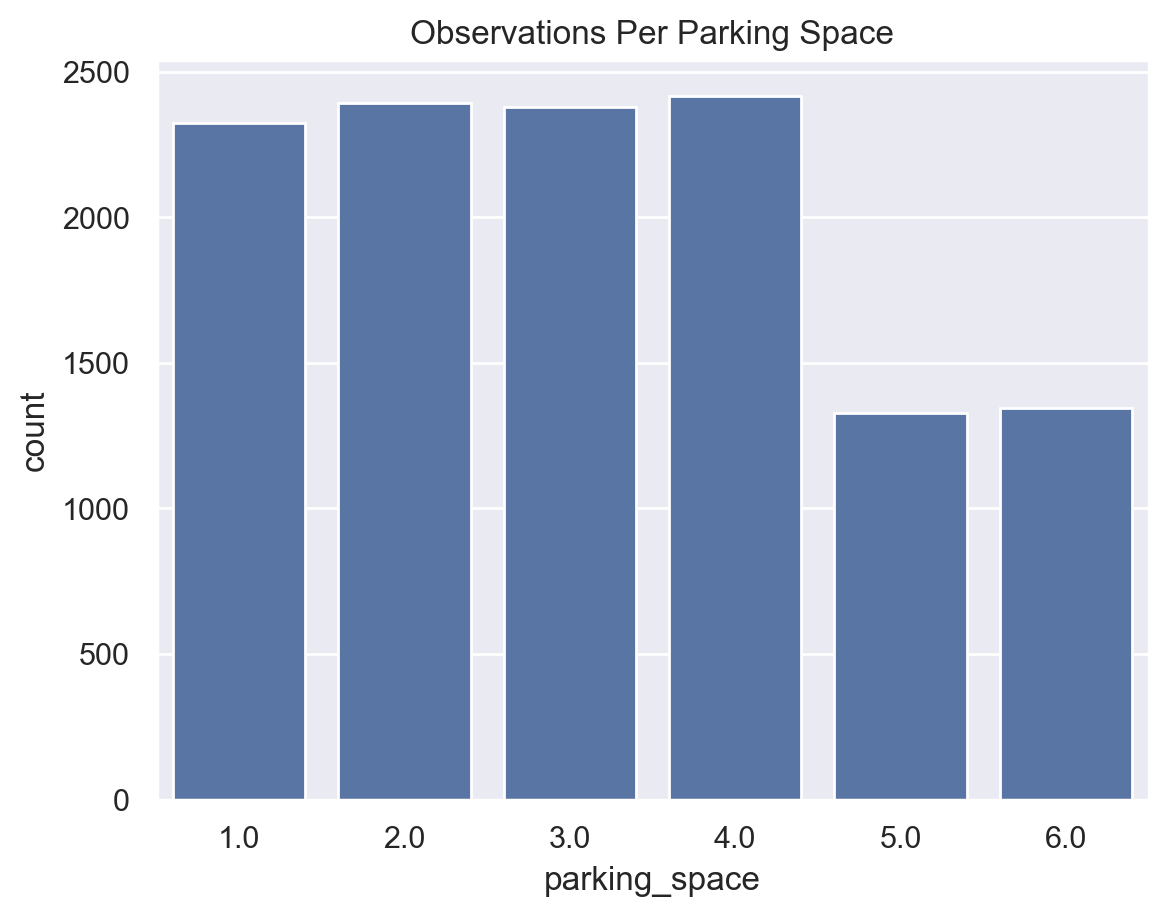

In [26]:
### 
train_data["parking_space"].min()

## Create a bar plot showing the count of observation per parking_space
sns.countplot(data = train_data, x = "parking_space")

plt.title("Observations Per Parking Space")

plt.show()

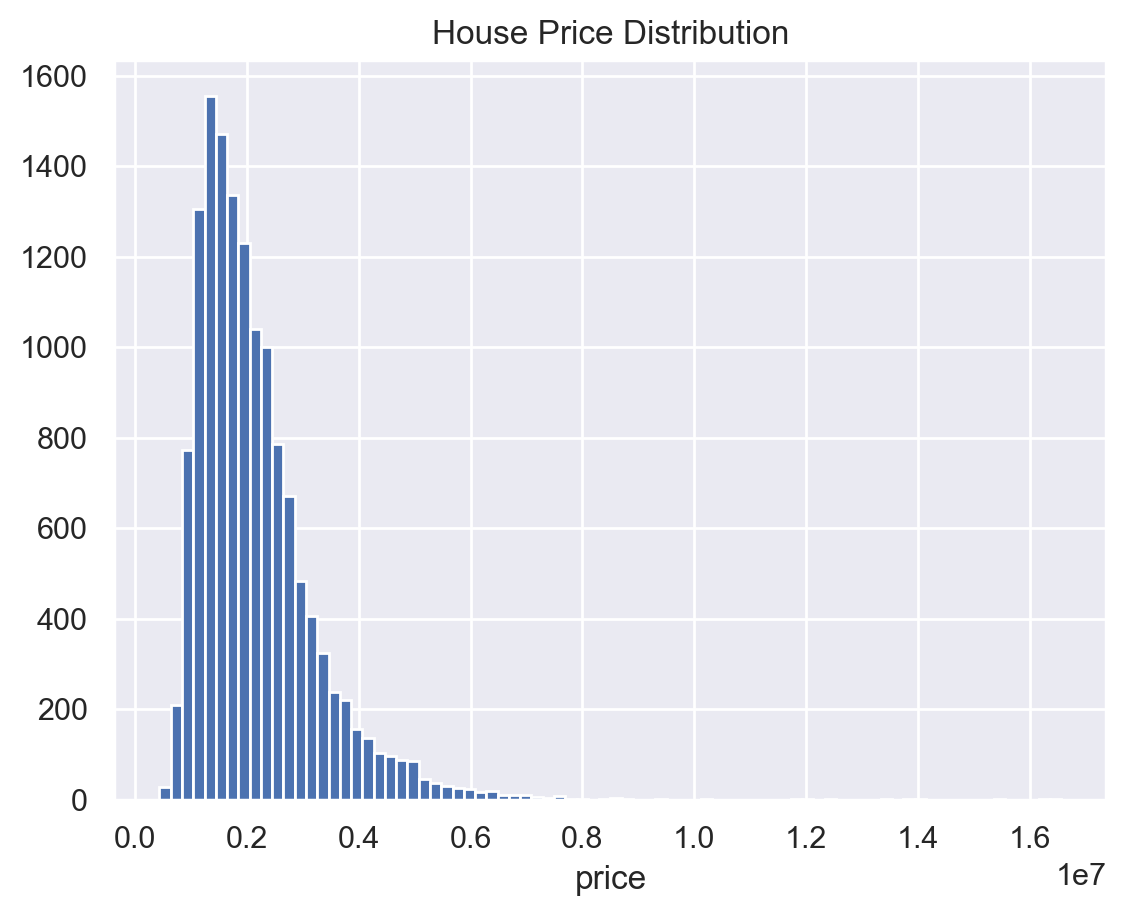

In [27]:
### show the distribution of the price variable

plt.hist(data = train_data, x = "price", bins = 80)
plt.xlabel("price")
plt.title("House Price Distribution")

plt.show()

## Data Cleaning and Preprocessing

In [29]:
## check for missing value

train_data.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

It is evident that all the features except for ID column have some missing values in them

In [31]:
## Handling missing values

## calculate the percentage of missing records for each column
percent_missing = train_data.isnull().sum() * 100 / len(train_data)
missing_value_df = pd.DataFrame({'column_name': train_data.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values("percent_missing").reset_index(drop = True)

,column_name,percent_missing
0,ID,0.0000
1,price,0.0000
2,title,12.3000
3,bedroom,12.8500
4,bathroom,12.8929
5,parking_space,12.9357
6,loc,12.9500


In [32]:
## Handle the mssing values in the location and title variable using the most frequent class
train_data["loc"] = train_data["loc"].fillna(train_data["loc"].value_counts().index[0])
train_data["title"] = train_data["title"].fillna(train_data["title"].value_counts().index[0])

In [33]:
## Get the most frequent bedroom category
train_data["bedroom"].value_counts().index[0]

5.0

In [34]:
## Get the most frequent bathroom category
train_data["bathroom"].value_counts().index[0]

1.0

In [35]:
## Get the most frequent parking_space category
train_data["parking_space"].value_counts().index[0]

4.0

In [36]:
## Handle the missing values in the bedroom, bathroom, and parking_space column using the most frequent class
train_data["bedroom"] = train_data["bedroom"].fillna(train_data["bedroom"].value_counts().index[0])

In [37]:
train_data["bathroom"] = train_data["bathroom"].fillna(train_data["bathroom"].value_counts().index[0])
train_data["parking_space"] = train_data["parking_space"].fillna(train_data["parking_space"].value_counts().index[0])

In [38]:
## chicking for nulls again
train_data.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [39]:
train_data.head(15)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0000,2.0000,1.0000,1149999.5650
1,2748,Ondo,Apartment,5.0000,2.0000,4.0000,1672416.6890
2,9261,Ekiti,Flat,7.0000,5.0000,4.0000,3364799.8140
3,2224,Anambra,Detached duplex,5.0000,2.0000,4.0000,2410306.7560
4,10300,Kogi,Terrace duplex,5.0000,5.0000,6.0000,2600700.8980
5,1733,Borno,Mansion,5.0000,1.0000,3.0000,1341750.8670
6,7892,Kwara,Bungalow,5.0000,4.0000,4.0000,2125789.7780
7,3003,Katsina,Penthouse,3.0000,3.0000,5.0000,2043107.5920
8,555,Osun,Semi-detached duplex,5.0000,1.0000,2.0000,1219453.8770
9,3085,Kaduna,Penthouse,5.0000,3.0000,3.0000,2710664.8720


In [40]:
## encoding values in the location and title columns into a numerical representation (i.e dummies variable)
train_data_with_dummies = pd.get_dummies(train_data, drop_first=True, dtype = "int")

In [41]:
train_data_with_dummies.head()

,ID,bedroom,bathroom,parking_space,price,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,...,loc_Zamfara,title_Bungalow,title_Cottage,title_Detached duplex,title_Flat,title_Mansion,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse
0,3583,2.0000,2.0000,1.0000,1149999.5650,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2748,5.0000,2.0000,4.0000,1672416.6890,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9261,7.0000,5.0000,4.0000,3364799.8140,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2224,5.0000,2.0000,4.0000,2410306.7560,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,10300,5.0000,5.0000,6.0000,2600700.8980,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
### taking the log of price
train_data_with_dummies["log_price"] = np.log(train_data_with_dummies["price"])
train_data_with_dummies["log_price"]

0       13.9553
1       14.3298
2       15.0289
3       14.6953
4       14.7713
          ...  
13995   14.6775
13996   14.6168
13997   14.6938
13998   15.0241
13999   14.8658
Name: log_price, Length: 14000, dtype: float64

In [43]:
train_data_with_dummies.head(3)

,ID,bedroom,bathroom,parking_space,price,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,...,title_Bungalow,title_Cottage,title_Detached duplex,title_Flat,title_Mansion,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse,log_price
0,3583,2.0000,2.0000,1.0000,1149999.5650,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,13.9553
1,2748,5.0000,2.0000,4.0000,1672416.6890,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14.3298
2,9261,7.0000,5.0000,4.0000,3364799.8140,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,15.0289


## Feature Scaling

In [45]:
## scale the relevant features using standard scaler
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
X_train = train_data_with_dummies.drop(["log_price", "ID", "price"], axis = 1)
y_train = train_data_with_dummies["log_price"]

In [48]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [49]:
X_train_scaled

array([[-1.04649755, -0.42313528, -1.50003433, ...,  3.12690281,
        -0.31530759, -0.32359049],
       [ 0.26322256, -0.42313528,  0.47610951, ..., -0.31980527,
        -0.31530759, -0.32359049],
       [ 1.13636929,  1.0545135 ,  0.47610951, ..., -0.31980527,
        -0.31530759, -0.32359049],
       ...,
       [ 1.57294266,  1.54706309,  1.13482413, ..., -0.31980527,
        -0.31530759, -0.32359049],
       [ 0.26322256,  1.54706309, -1.50003433, ..., -0.31980527,
        -0.31530759, -0.32359049],
       [ 2.00951603,  2.03961269,  1.13482413, ..., -0.31980527,
        -0.31530759, -0.32359049]])

## Model training

In [51]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

## Model Evaluation

In [53]:
X_test = test_data.drop(["ID"], axis = 1)
X_test_with_dummies = pd.get_dummies(X_test, drop_first=True, dtype = "int")
X_test_with_dummies.head(2)

,bedroom,bathroom,parking_space,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,loc_Benue,loc_Borno,...,loc_Zamfara,title_Bungalow,title_Cottage,title_Detached duplex,title_Flat,title_Mansion,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse
0,4,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,2,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X_test_scaled = scaler.transform(X_test_with_dummies)

In [55]:
## making prediction
pred_price = reg.predict(X_test_scaled)

In [56]:
pred_price

array([14.61463326, 13.85924668, 14.0524127 , ..., 14.49819452,
       14.20794585, 15.00056137])

In [124]:
pred_price.shape

(6000,)

In [130]:
y_train_sample = y_train.sample(n = 6000)
y_train_sample.shape

(6000,)

In [158]:
## evaluate the model using MSE metric
print("The Mean_Squared_Error:", round(mean_squared_error(y_train_sample, pred_price),2))

The Mean_Squared_Error: 0.38


In [156]:
comparison = pd.DataFrame()
comparison['Actual_price_log'] = y_train_sample
comparison['Predicted_price_log'] = pred_price


comparison

,Actual_price_log,Predicted_price_log
8963,14.8635,14.6146
5447,15.2109,13.8592
2271,14.6154,14.0524
6096,15.5382,16.2143
6625,14.0839,14.3508
...,...,...
10926,14.2646,14.3849
13486,14.9825,14.4535
3096,14.1597,14.4982
9924,13.7926,14.2079


In [154]:
test_data["predicted_price"] = np.exp(pred_price)
test_data_with_price_prediction = test_data
test_data_with_price_prediction

,ID,loc,title,bedroom,bathroom,parking_space,predicted_price
0,845,Kano,Penthouse,4,1,2,2223589.3295
1,1924,Adamawa,Apartment,2,2,4,1044706.6412
2,10718,Adamawa,Bungalow,2,7,2,1267317.0995
3,12076,Lagos,Mansion,9,5,2,11009684.9808
4,12254,Gombe,Semi-detached duplex,5,6,1,1707933.9123
...,...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4,5,2,1767145.0565
5996,2416,Adamawa,Terrace duplex,5,7,1,1892586.3744
5997,10195,Oyo,Townhouse,4,1,4,1979182.6692
5998,9455,Bauchi,Flat,3,7,5,1480582.0608


## Summary 

By looking at MSE value of 0.38, this value is very low which indicate higher accuracy of the model. This further suggest that the model's prediction is very reliable and can be safely used for inference purposes